In [1]:
#pip install remode
from remode import ReMoDe, perform_fisher_test, perform_binomial_test
import numpy as np
import matplotlib.pyplot as plt

## Basic example of ReMoDe

{'nr_of_modes': 2, 'modes': array([1, 6]), 'p_values': array([5.43120690e-06, 4.27329283e-11]), 'approx_bayes_factors': array([5.58707110e+03, 3.60562337e+08]), 'xt': array([ 8, 20,  5,  2,  6,  2, 30]), 'alpha_after_correction': 0.016666666666666666}
mode p-values: [5.43120690e-06 4.27329283e-11]
approx Bayes factors: [5.58707110e+03 3.60562337e+08]


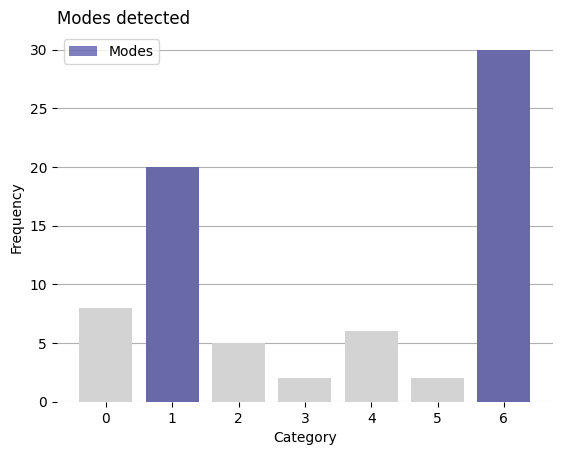

In [2]:
## Histogram counts
xt_count = [8, 20, 5, 2, 6, 2, 30]

# Start ReMoDe (default uses descriptive-peaks alpha correction)
remode = ReMoDe()

# Fit the data and inspect mode statistics
result = remode.fit(xt_count)
print(result)
print('mode p-values:', result['p_values'])
print('approx Bayes factors:', result['approx_bayes_factors'])

remode.plot_maxima()


72.0


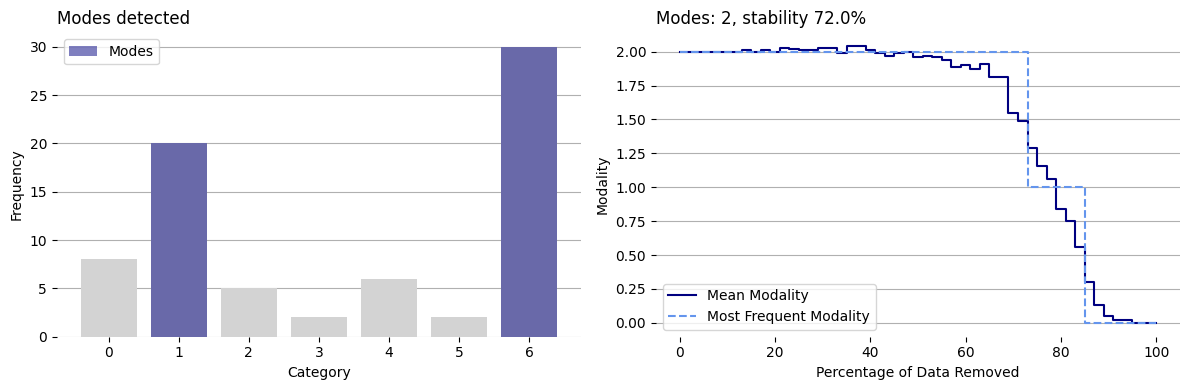

In [3]:
# Test robustness using jackknife
robustness = remode.remode_stability(percentage_steps=50)
print(robustness['stable_until'])


{'nr_of_modes': 1, 'modes': array([2]), 'p_values': array([0.]), 'approx_bayes_factors': array([inf]), 'xt': array([41, 34, 71, 36, 18]), 'alpha_after_correction': 0.025}
mode p-values: [0.]
approx Bayes factors: [inf]


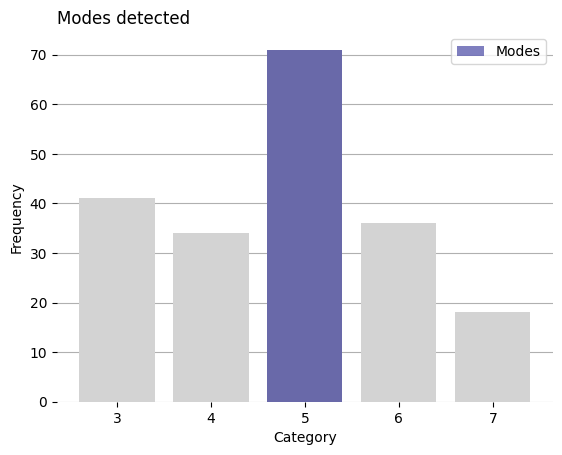

In [4]:
## Converting individual points to count data
# Generate random data
np.random.seed(0)
data = np.random.choice(range(3, 8), 200, p=[0.2, 0.2, 0.3, 0.2, 0.1])

# Start ReMoDe
remode = ReMoDe()

# Create count data
xt_count = remode.format_data(data)

# Fit the data and inspect mode statistics
result = remode.fit(xt_count, levels=np.arange(3, 8))
print(result)
print('mode p-values:', result['p_values'])
print('approx Bayes factors:', result['approx_bayes_factors'])

remode.plot_maxima()


## Options of  ReMoDe()




In [5]:
remode = ReMoDe(
    alpha=0.05,  # alpha level desired (adjusted recursively for multiple testing)
    alpha_correction='descriptive_peaks',  # or 'max_modes', 'none', or custom function
    statistical_test=perform_fisher_test,  # or perform_binomial_test, or custom function
)


In [6]:
remode = ReMoDe(
    alpha=0.05,
    alpha_correction='max_modes',  # example of the alternative built-in correction
    statistical_test=perform_fisher_test,
)


In [7]:
# Example of custom statistical test (this is actually `perform_binomial_test`)
from scipy.stats import binomtest

def custom_test(x, candidate, left_min, right_min):
    """Return left/right p-values for a candidate maximum."""
    n_left = x[candidate] + x[left_min]
    n_right = x[candidate] + x[right_min]
    p_left = binomtest(x[candidate], n_left, alternative='greater').pvalue
    p_right = binomtest(x[candidate], n_right, alternative='greater').pvalue
    return p_left, p_right


# Example of custom alpha adjustment
def custom_adjustment(segment_or_length, alpha):
    """Adjust alpha as a function of segment size."""
    if hasattr(segment_or_length, '__len__'):
        length = len(segment_or_length)
    else:
        length = int(segment_or_length)
    return alpha / max(1, length)


remode = ReMoDe(
    alpha=0.05,
    statistical_test=custom_test,
    alpha_correction=custom_adjustment,
)
